In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['axes.labelsize'] = 24
from skimage import transform
%matplotlib inline

In [39]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

### Данные:
Будем работать с датасетом [Boston Housing Prices](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef).

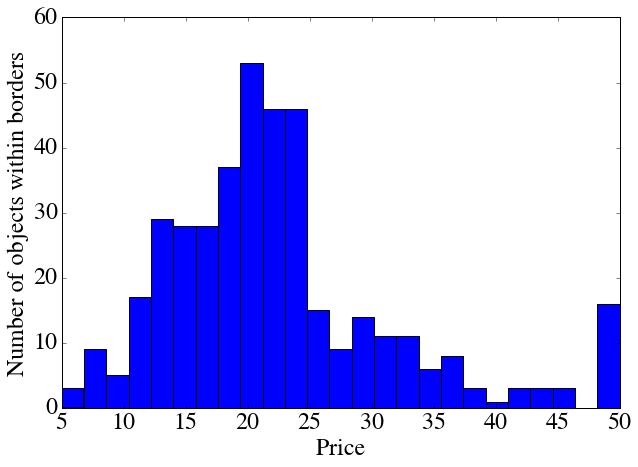

In [40]:
plt.figure(figsize=(10,7))
plt.hist(y_train, bins=25)
plt.ylabel('Number of objects within borders')
plt.xlabel('Price')
plt.show()

### Задание.
Будем решать задачу регрессии. Целевая переменная -- цена дома, признаки - различная информация о домохозяйстве. Для решения будем использовать линейную регрессию. Ваша задача - оценить качество решения в зависимости от количества объектов в обучающей выборке. Качество решения будем оценивать с помощью среднеквадратичной и среднеабсолютной ошибки, а так же [коэффициента детерминации $r^2$](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination). Также требуется оценить дисперсию данных функционалов в зависимости от числа объектов в обучающей выборке. 

*Обращаем ваше внимание, что для качественной оценки данных зависимостей эксперименты для каждого размера выборки стоит повторять многократно на различных случайных подвыборках.*

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

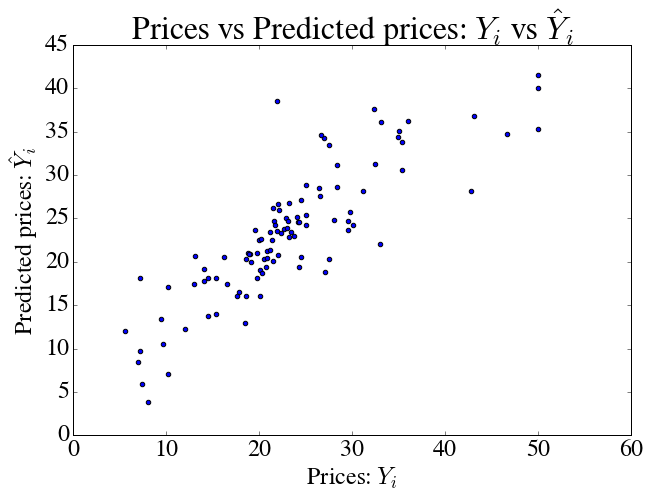

In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [43]:
print('mae = {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse = {}'.format(mean_squared_error(y_test, y_pred)))
print('prediction variance = {}'.format(np.std((y_test - y_pred)**2)))

mae = 3.46418581241
mse = 23.1955992564
prediction variance = 45.7804868503


Now we iterate over different sizes of $X_{train}$ subset and fit a linear regeression on these subsets, averaging metrics on subsets of the same sized (which are choosed randomly) 

In [44]:
#initialization of arrays for metrics and their variances 
maes = np.zeros(95)
mses = np.zeros(95)
r2scores = np.zeros(95)
maes_disp = np.zeros(95)
mses_disp = np.zeros(95)
r2scores_disp = np.zeros(95)

train_sizes = np.arange(95)
averaging = 40

for nums in train_sizes:
    mae_inst = 0
    mse_inst = 0
    r2score_inst = 0
    mae_inst_sq = 0
    mse_inst_sq = 0
    r2score_inst_sq = 0
    for iters in np.arange(averaging):
        #random choice of subset of X_train
        inds = np.random.choice(np.arange(404), size=nums*4+28, replace=False) 
        lm = LinearRegression()
        lm.fit(X_train[inds, :], y_train[inds])
        #prediction on X_test
        y_pred = lm.predict(X_test)
        #metrics computation
        mae_inst += mean_absolute_error(y_test, y_pred)
        mse_inst += mean_squared_error(y_test, y_pred)
        r2score_inst += r2_score(y_test, y_pred)
        mae_inst_sq += mean_absolute_error(y_test, y_pred)**2
        mse_inst_sq += mean_squared_error(y_test, y_pred)**2
        r2score_inst_sq += r2_score(y_test, y_pred)**2
    #metrics averaging on subsets of fixed size
    maes[nums] = mae_inst / averaging
    mses[nums] = mse_inst / averaging
    r2scores[nums] = r2score_inst / averaging
    maes_disp[nums] = mae_inst_sq /averaging - (mae_inst / averaging)**2
    mses_disp[nums] = mse_inst_sq /averaging - (mse_inst / averaging)**2
    r2scores_disp[nums] = r2score_inst_sq /averaging - (r2score_inst / averaging)**2

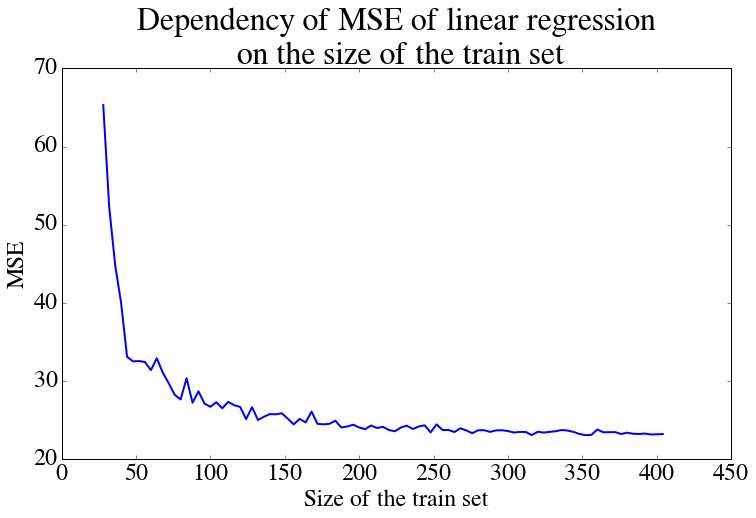

In [45]:
plt.figure(figsize=(12, 7))
plt.plot(train_sizes*4+28, mses)
plt.xlabel("Size of the train set")
plt.ylabel("MSE")
plt.title("Dependency of MSE of linear regression\n on the size of the train set")

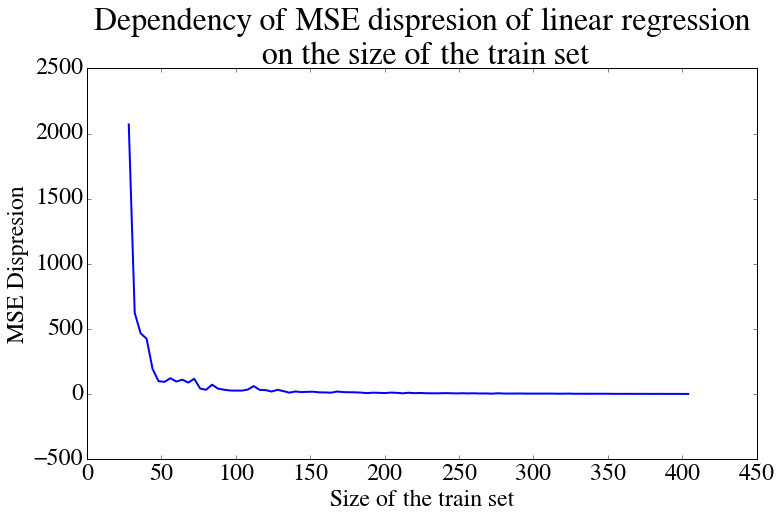

In [46]:
plt.figure(figsize=(12,7))
plt.plot(train_sizes*4+28, mses_disp)
plt.xlabel("Size of the train set")
plt.ylabel("MSE Dispresion")
plt.title("Dependency of MSE dispresion of linear regression\n on the size of the train set")

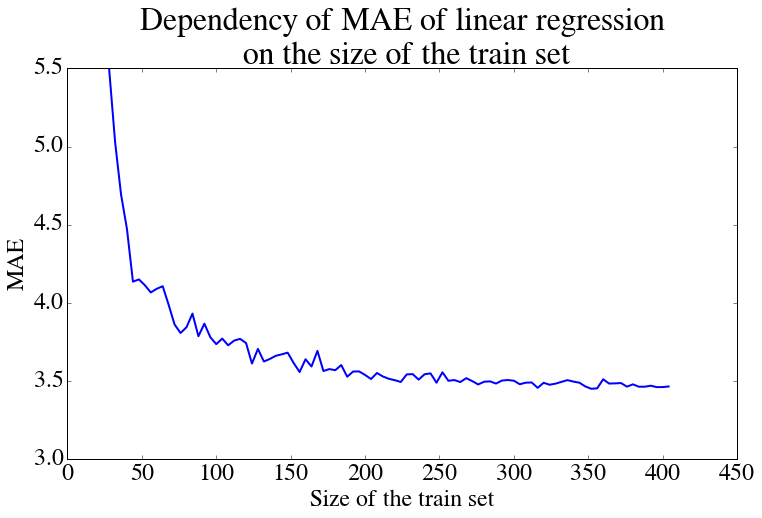

In [47]:
plt.figure(figsize=(12, 7))
plt.plot(train_sizes*4+28, maes)
plt.xlabel("Size of the train set")
plt.ylabel("MAE")
plt.title("Dependency of MAE of linear regression\n on the size of the train set")

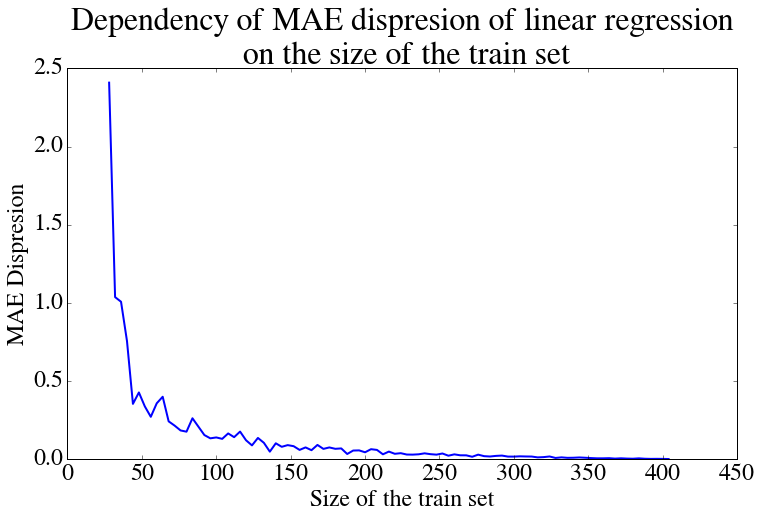

In [48]:
plt.figure(figsize=(12,7))
plt.plot(train_sizes*4+28, maes_disp)
plt.xlabel("Size of the train set")
plt.ylabel("MAE Dispresion")
plt.title("Dependency of MAE dispresion of linear regression\n on the size of the train set")

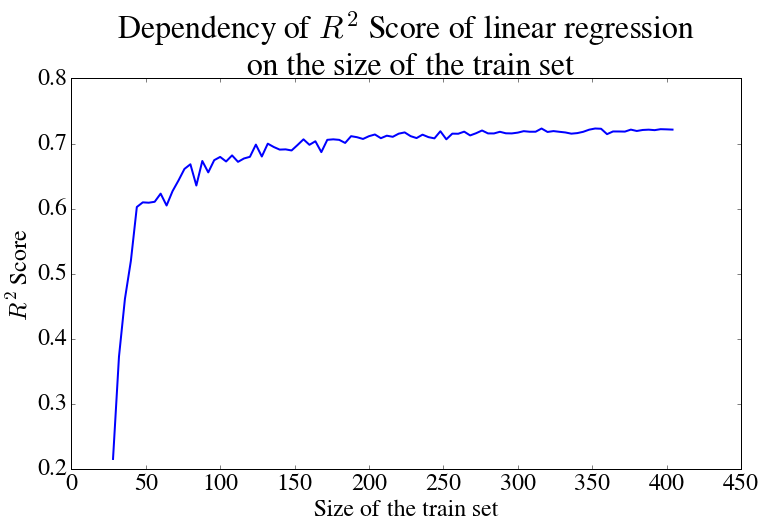

In [49]:
plt.figure(figsize=(12,7))
plt.plot(train_sizes*4+28, r2scores)
plt.xlabel("Size of the train set")
plt.ylabel("$R^2$ Score")
plt.title("Dependency of $R^2$ Score of linear regression\n on the size of the train set")

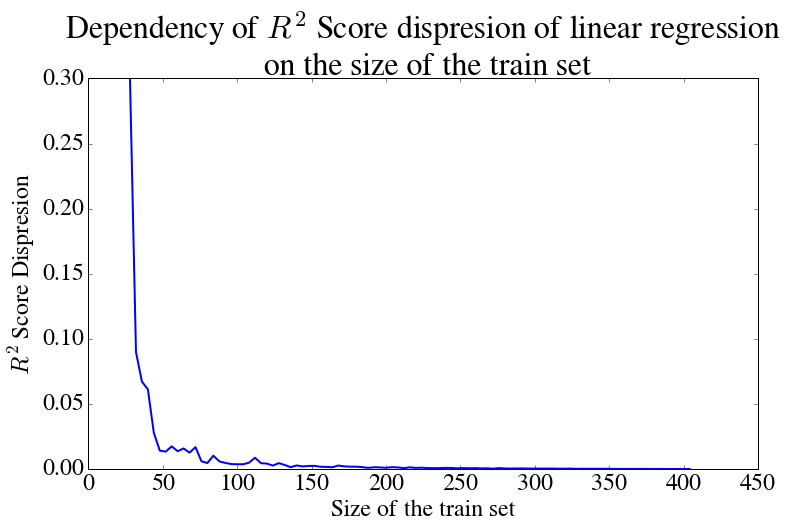

In [50]:
plt.figure(figsize=(12,7))
plt.plot(train_sizes*4+28, r2scores_disp)
plt.xlabel("Size of the train set")
plt.ylabel("$R^2$ Score Dispresion")
plt.title("Dependency of $R^2$ Score dispresion of linear regression\n on the size of the train set")